In [1]:
import os
import random

import numpy as np
import cv2

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
from PIL import Image 

In [5]:
from skimage import io as skio
url = 'https://images.unsplash.com/photo-1434389677669-e08b4cac3105?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=949&q=80'
image = skio.imread(url)

In [6]:
print("shape of image: {}".format(image.shape))
print("dtype of image: {}".format(image.dtype))

shape of image: (1362, 949, 3)
dtype of image: uint8


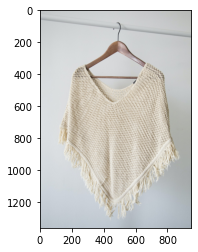

In [7]:
plt.imshow(image)

In [8]:
def remove_background(img, threshold):
    """
    This method removes background from your image
    
    :param img: cv2 image
    :type img: np.array
    :param threshold: threshold value for cv2.threshold
    :type threshold: float
    :return: RGBA image
    :rtype: np.ndarray
    """
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshed = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    cnts = cv2.findContours(morphed, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)[0]

    cnt = sorted(cnts, key=cv2.contourArea)[-1]

    mask = cv2.drawContours(threshed, cnt, 0, (0, 255, 0), 0)
    masked_data = cv2.bitwise_and(img, img, mask=mask)

    x, y, w, h = cv2.boundingRect(cnt)
    dst = masked_data[y: y + h, x: x + w]

    dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(dst_gray, 0, 255, cv2.THRESH_BINARY)
    b, g, r = cv2.split(dst)

    rgba = [r, g, b, alpha]
    dst = cv2.merge(rgba, 4)

    return dst

original:


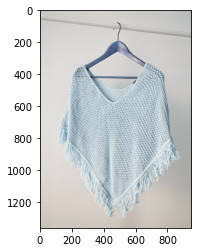

In [12]:
print("original:")
plt.imshow(image)

In [13]:
im = remove_background(image, threshold=250.)
plt.imshow(im)

ValueError: too many values to unpack (expected 3)